In [3]:
import re
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
from matplotlib import style, colors
from matplotlib import gridspec

matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 6)

plt.style.context("seaborn-whitegrid")
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25

use all calls from strelka: this is prefered since this takes into consideration of all soamtic calls:snvs and indels, high/moderate/low/modifier impacts.

In [4]:
f1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/HIGH_MODERATE_SNV_summary_with_normal_with_AF.tsv'
df = pd.read_csv(f1, sep='\t', comment='#', usecols=['gene', 'patient_ID', 'adj_t_DNA_AF', 'in_strelka'])
df.head(2)

,gene,patient_ID,in_strelka,adj_t_DNA_AF
0,WASH7P,HTMCP-03-06-02175_malignant,not_in_strelka,0.35
1,WASH7P,HTMCP-03-06-02238_malignant,not_in_strelka,0.30


In [5]:
# filter for strelka calls
df = df[df.in_strelka == 'in_strelka']
df.head(2)

,gene,patient_ID,in_strelka,adj_t_DNA_AF
3,WASH7P,HTMCP-03-06-02149_malignant,in_strelka,0.04
304,SAMD11,HTMCP-03-06-02214_malignant,in_strelka,0.32


In [6]:
df.shape

(45646, 4)

In [7]:
df['patient'] = df['patient_ID'].str.replace('_malignant', '')
df = df.drop('patient_ID', axis=1)

In [8]:
df.head(2)

,gene,in_strelka,adj_t_DNA_AF,patient
3,WASH7P,in_strelka,0.04,HTMCP-03-06-02149
304,SAMD11,in_strelka,0.32,HTMCP-03-06-02214


In [9]:
# add in hiv status and histology
# get meta track for example histology
f3 ='/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/mutation_load_clinic.txt'
df3 = pd.read_csv(f3, sep='\t')
df3 = df3[['patient', 'reanne_HIV_status', 'reanne_Putative_histology']]
# df3 = df3.set_index('patient')#.stack().reset_index()
df3.head(2)

,patient,reanne_HIV_status,reanne_Putative_histology
0,HTMCP-03-06-02001,Positive,Squamous
1,HTMCP-03-06-02002,Negative,Squamous


In [10]:
dfm = pd.merge(df, df3, left_on='patient', right_on='patient')

In [11]:
dfm = dfm[dfm.adj_t_DNA_AF != 'na']

In [12]:
dfm.head()

,gene,in_strelka,adj_t_DNA_AF,patient,reanne_HIV_status,reanne_Putative_histology
0,WASH7P,in_strelka,0.04,HTMCP-03-06-02149,Negative,Squamous
1,RSG1,in_strelka,0.16,HTMCP-03-06-02149,Negative,Squamous
2,MST1P9,in_strelka,0.28,HTMCP-03-06-02149,Negative,Squamous
3,ZMYM1,in_strelka,0.14,HTMCP-03-06-02149,Negative,Squamous
4,NCDN,in_strelka,0.44,HTMCP-03-06-02149,Negative,Squamous


In [13]:
dfm.shape

(45118, 6)

In [14]:
# dfm[dfm.reanne_HIV_status == 'Positive']['adj_t_DNA_AF'].value_counts()

In [15]:
# dfm[dfm.reanne_HIV_status == 'Positive'][y]

In [16]:
# dfm = dfm[dfm.patient == 'HTMCP-03-06-02149']

In [17]:
# dfm[dfm.reanne_HIV_status == 'Negative']

/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


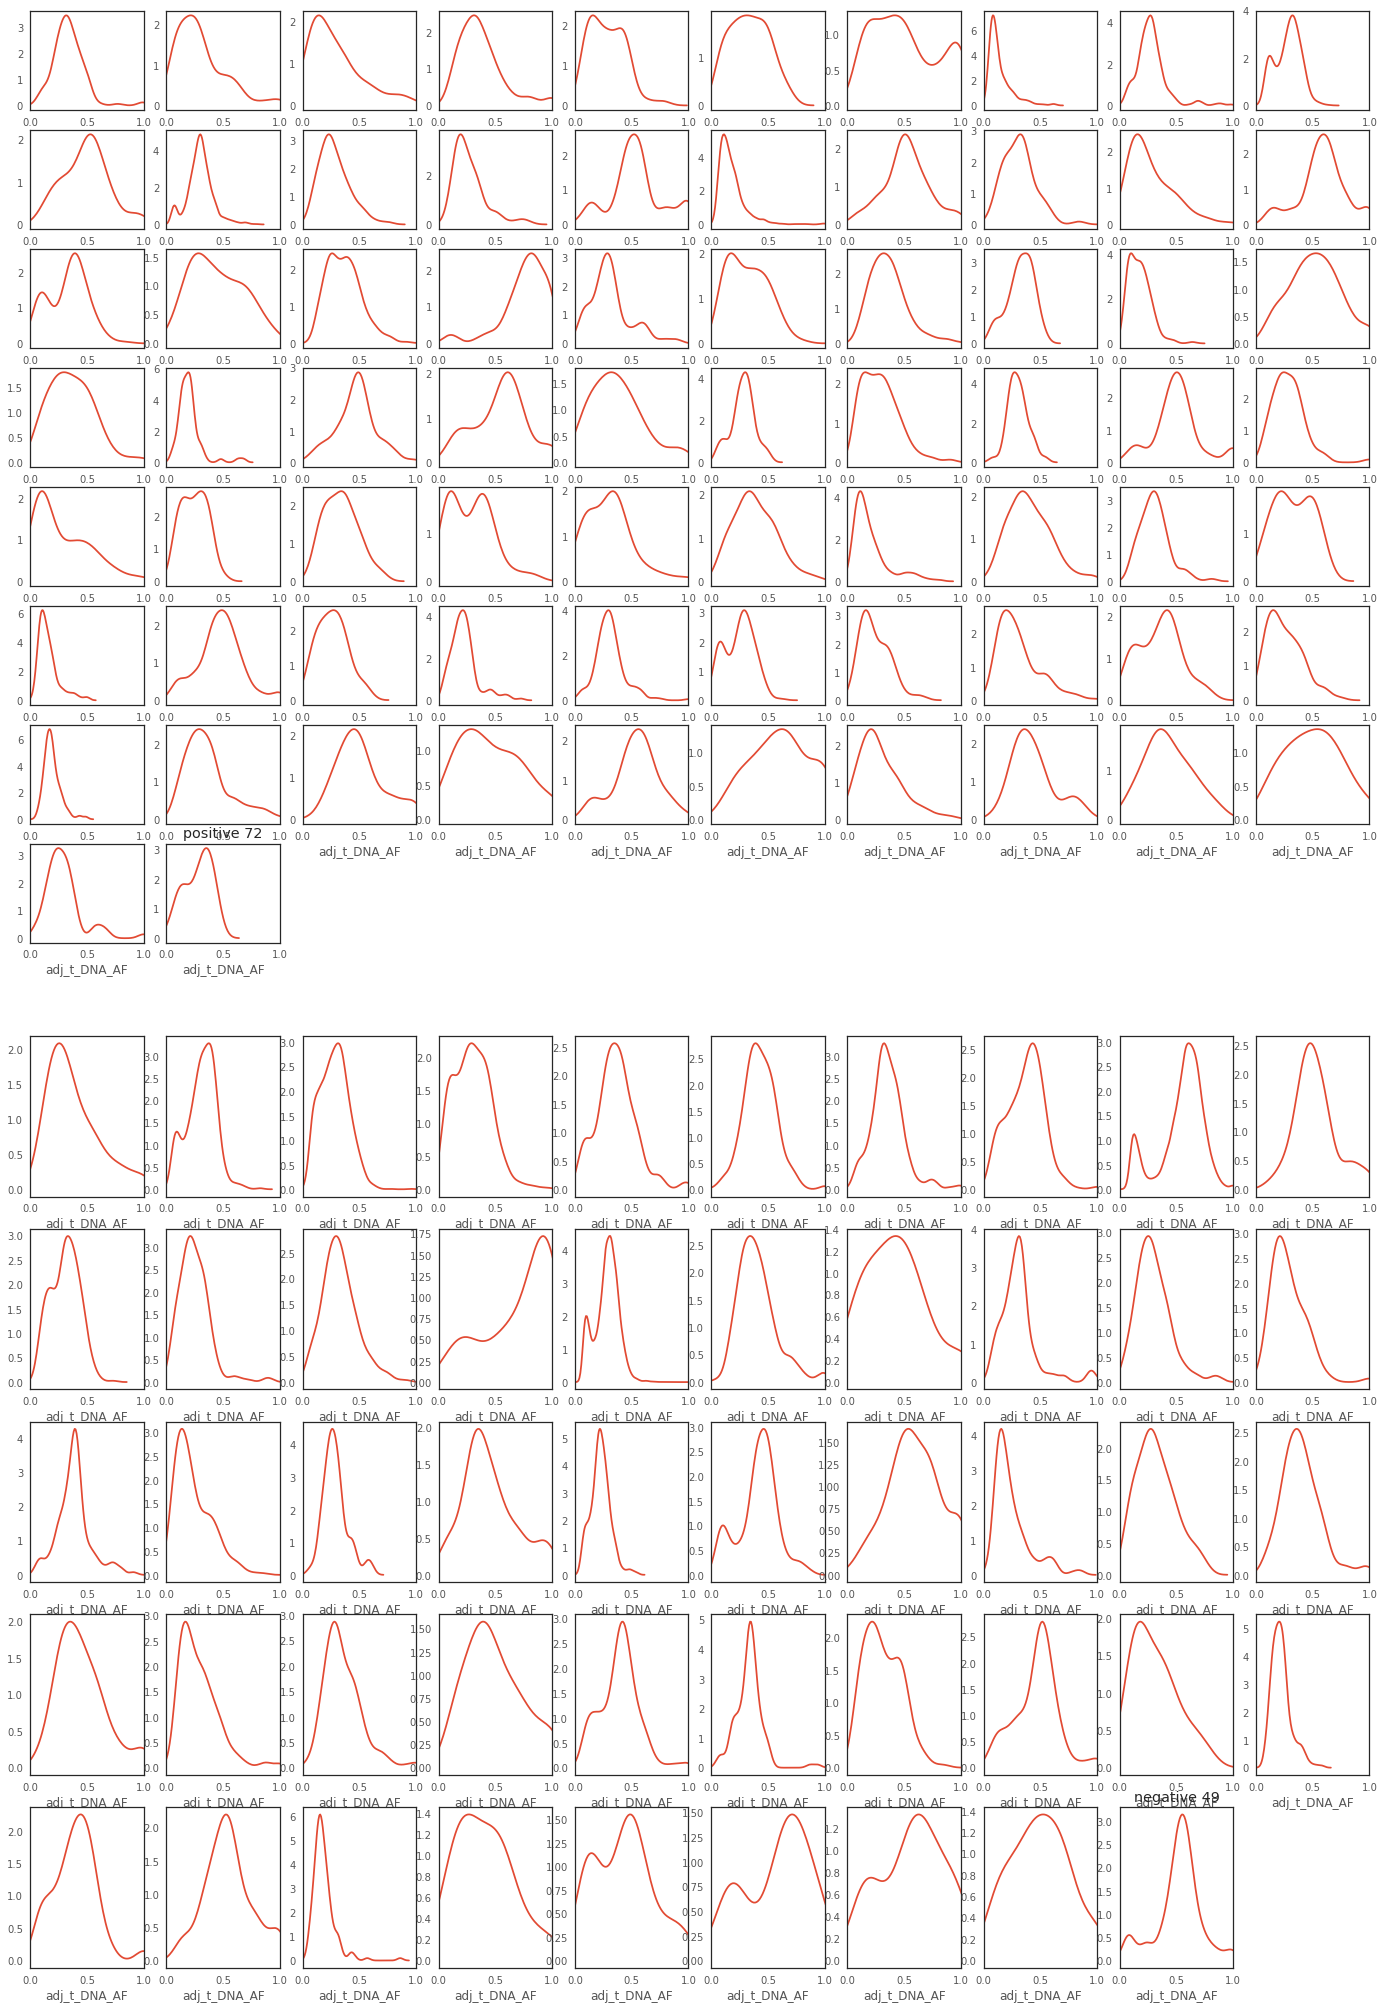

In [18]:
fig = plt.figure(facecolor='w', figsize=(24,36))
x1 = 'reanne_HIV_status'
x2 = 'combo'
x3 = 'reanne_Putative_histology'
y = 'adj_t_DNA_AF'

gs = gridspec.GridSpec(2, 1, height_ratios=[1,1], width_ratios=[1], 
                       wspace=0.05, # horizontal space
                       hspace=0.1  # vertical space
                      )


dfm1  = dfm[dfm.reanne_HIV_status == 'Positive']
patients = dfm1.patient.unique().tolist()
gs01 = gridspec.GridSpecFromSubplotSpec(int(len(patients)/10)+1, 10,  subplot_spec=gs[0])

for k, patient in enumerate(patients):
    ax = fig.add_subplot(gs01[k], facecolor='white')
    sns.distplot(dfm[dfm.patient == patient][y].astype(float), hist=False)
    ax.set_xlim(0,1)
plt.title('positive {}'.format(len(patients)))

gs01.set_title("somatic mutations (Strelka calls)")


dfm2  = dfm[dfm.reanne_HIV_status == 'Negative']
patients = dfm2.patient.unique().tolist()


gs02 = gridspec.GridSpecFromSubplotSpec(int(len(patients)/10)+1, 10,  subplot_spec=gs[1])
for k, patient in enumerate(patients):
    ax = fig.add_subplot(gs02[k], facecolor='white')
    sns.distplot(dfm[dfm.patient == patient][y].astype(float), hist=False)
    ax.set_xlim(0,1)
plt.title('negative {}'.format(len(patients)))


plt.show()
plt.close()

/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


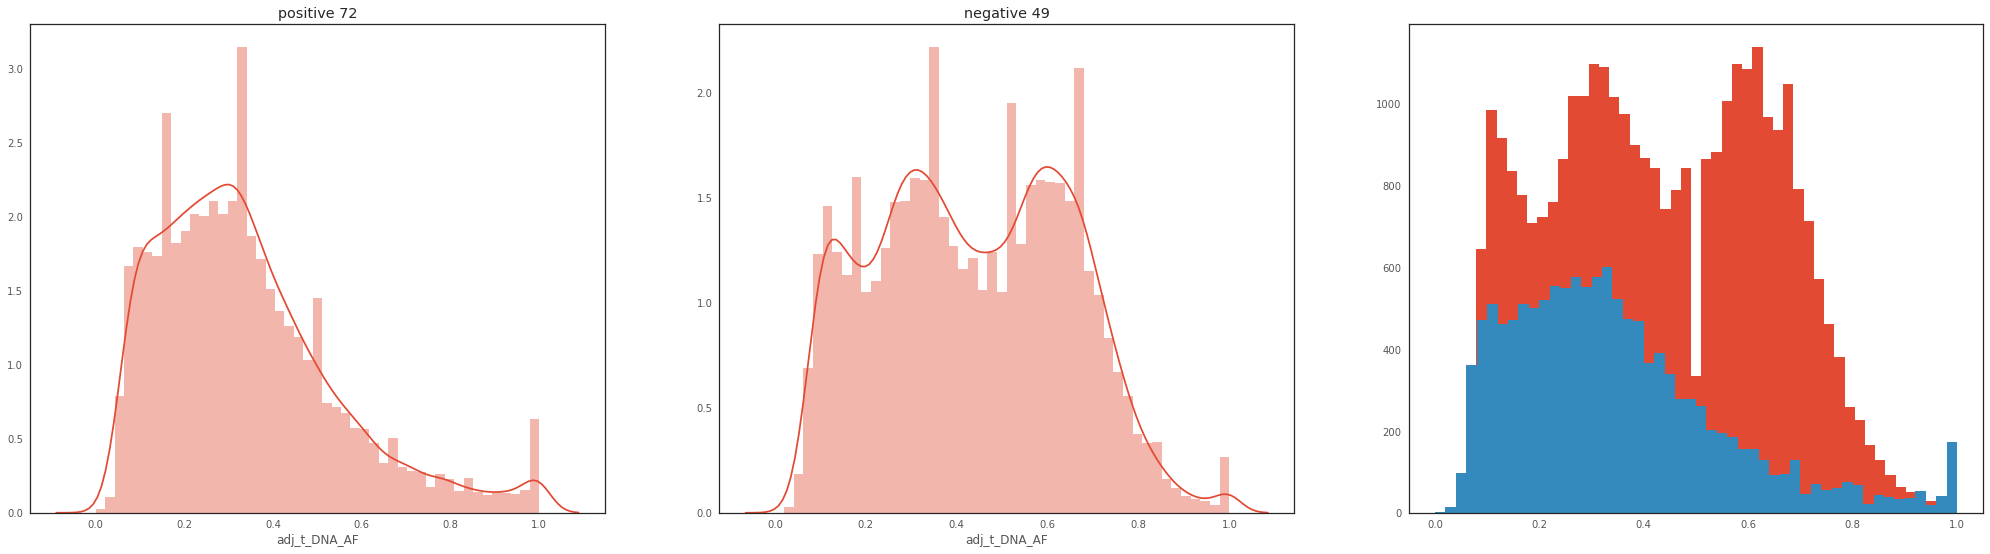

In [27]:
matplotlib.rcParams['figure.figsize'] = (30, 9)
fig = plt.figure(facecolor='w', figsize=(35,9))
x1 = 'reanne_HIV_status'
x2 = 'combo'
x3 = 'reanne_Putative_histology'
y = 'adj_t_DNA_AF'
ax1 = plt.subplot(131,facecolor='w')
# sns distribution plot
dfm1 = dfm[dfm.reanne_HIV_status == 'Positive']
patients = dfm1.patient.unique().tolist()
sns.distplot(dfm1[y].astype(float))
plt.title('positive {}'.format(len(patients)))


ax2 = plt.subplot(132,facecolor='w')
dfm2 = dfm[dfm.reanne_HIV_status == 'Negative']
patients = dfm2.patient.unique().tolist()
sns.distplot(dfm2[y].astype(float))
plt.title('negative {}'.format(len(patients)))


# dfm2  = dfm[dfm.reanne_HIV_status == 'Negative']
# patients = dfm2.patient.unique().tolist()
# for patient in patients[:10]:
#     sns.distplot(dfm[dfm.patient == patient][y].astype(float), hist=False)
    
    
# density plot
ax3 = plt.subplot(133,facecolor='w')
ax3.hist(dfm[dfm.reanne_HIV_status == 'Negative'][y].astype(float), bins=50)
ax3.hist(dfm[dfm.reanne_HIV_status == 'Positive'][y].astype(float), bins=50)

# ax1.set_title("somatic mutations (Strelka calls)")
# ax1.set(xlabel='HIV_status')

# ax2 = plt.subplot(222)

plt.show()
plt.close()


should use tumour content adjusted AF
individual patient